In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Load Packages and Data

In [2]:
import os
import sys
import cProfile

# to import custom scripts
path = os.path.join(os.path.abspath('.'))
sys.path.append(path)
print(path)

C:\Users\Rod Gabriel\OneDrive - ASIAN INSTITUTE OF MANAGEMENT\Desktop\MSDS2023\MLOPS\Project\mlo-final-project\code


In [3]:
# !pip install --upgrade tensorflow

In [4]:
from model import *
from test_functions import *

In [5]:
model_instance = poem_classifier_model()
model_instance.load_data() 
model_instance.preprocess()

[nltk_data] Downloading package stopwords to C:\Users\Rod
[nltk_data]     Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Testing

### Expectation Testing

In [6]:
try:
    test_data(model_instance.df_train)
    print("Passed test_data")
except:
    print("Failed test_data")

Passed test_data


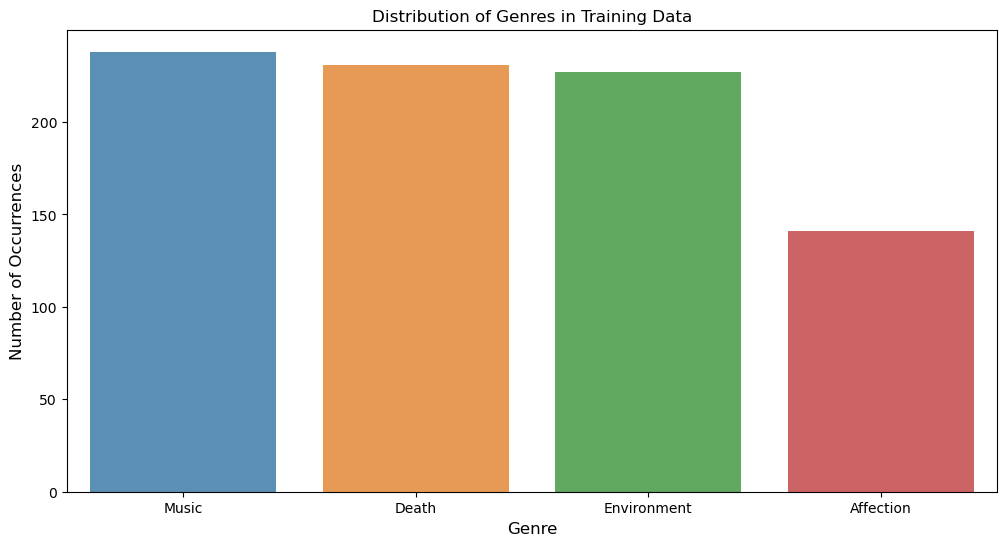

In [7]:
# visualize
genre_counts = model_instance.df_train['Genre'].value_counts()
    
plt.figure(figsize=(12,6))
sns.barplot(genre_counts.index, genre_counts.values, alpha=0.8)
plt.title('Distribution of Genres in Training Data')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

### Memorization Testing

In [8]:
test_memorization(model_instance, subset_size=25, epochs=10, acc_thresh=0.99)

Epoch 1/10
1/1 [==============================] - 1s 591ms/step - loss: 1.3901 - acc: 0.2000 - val_loss: 1.3983 - val_acc: 0.2000
Epoch 2/10
1/1 [==============================] - 0s 58ms/step - loss: 1.3836 - acc: 0.3500 - val_loss: 1.3979 - val_acc: 0.2000
Epoch 3/10
1/1 [==============================] - 0s 62ms/step - loss: 1.3680 - acc: 0.5500 - val_loss: 1.3975 - val_acc: 0.2000
Epoch 4/10
1/1 [==============================] - 0s 57ms/step - loss: 1.3636 - acc: 0.6000 - val_loss: 1.3972 - val_acc: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 60ms/step - loss: 1.3496 - acc: 0.6500 - val_loss: 1.3970 - val_acc: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 58ms/step - loss: 1.3388 - acc: 0.7000 - val_loss: 1.3968 - val_acc: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 64ms/step - loss: 1.3271 - acc: 0.8500 - val_loss: 1.3967 - val_acc: 0.4000
Epoch 8/10
1/1 [==============================] - 0s 70ms/step - loss: 1.3188 - acc: 0.6500 - va

AssertionError: Model's accuracy 68.00% on the subset is below the expected threshold.

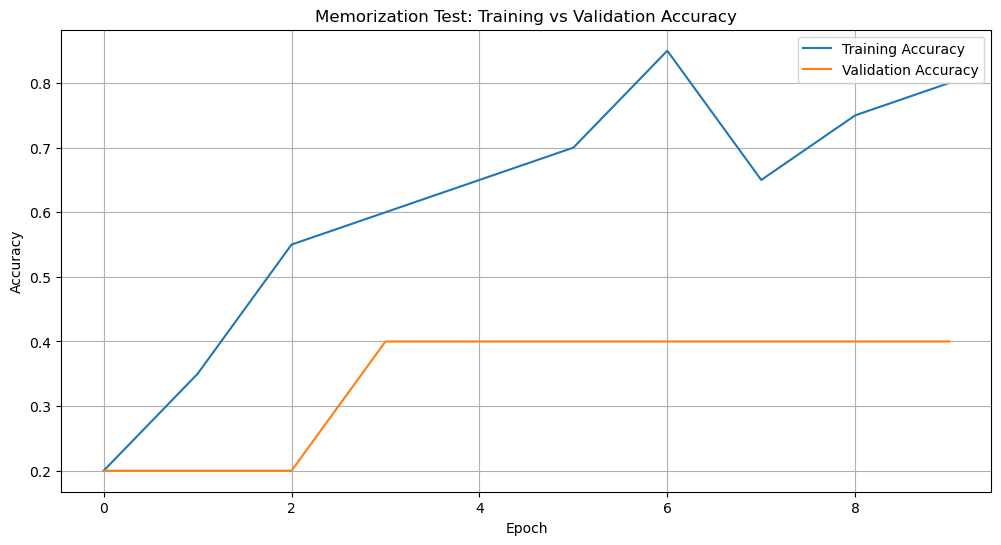

In [9]:
plot_memorization_test(model_instance)

### Classification Testing

In [16]:
def test_classification(max_epochs_per_iteration=10, max_iterations=50):  # safeguard to avoid infinite loops
    
    poem_model = poem_classifier_model()
    poem_model.load_data()
    poem_model.preprocess()

    iteration = 0
    best_accuracy = 0  # to store the best accuracy achieved
    
    while iteration < max_iterations:
        iteration += 1
        print(f"\nTraining iteration {iteration}...")
        poem_model.train(epochs=max_epochs_per_iteration)
        _, acc = poem_model.test()
        
        # Store the best accuracy achieved
        if acc > best_accuracy:
            best_accuracy = acc
            poem_model.model.save("best_testclassifmodel.h5")  # saving the best model
        
        print(f"After {iteration} iterations, validation accuracy is: {acc:.2f}")
        
        # Check if the model is "good"
        poem_model._is_good()
        if acc > poem_model.thresh:
            print(f"Model met the internal threshold after {iteration} iterations.")
            break
    else:  # this part of 'else' will execute if the 'while' loop finishes without 'break'
        print(f"Max iterations reached. Best validation accuracy achieved: {best_accuracy:.2f}")

    return best_accuracy

In [17]:
# Call the function
best_accuracy = test_classification()
print(f"Best achieved accuracy: {best_accuracy:.2f}")


Training iteration 1...
Epoch 1/10


[nltk_data] Downloading package stopwords to C:\Users\Rod
[nltk_data]     Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


21/21 [==============================] - 1s 26ms/step - loss: 1.3738 - acc: 0.2870 - val_loss: 1.3594 - val_acc: 0.3095
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 1.3565 - acc: 0.4051 - val_loss: 1.3496 - val_acc: 0.3690
Epoch 3/10
21/21 [==============================] - 1s 26ms/step - loss: 1.3460 - acc: 0.4380 - val_loss: 1.3412 - val_acc: 0.4107
Epoch 4/10
21/21 [==============================] - 1s 34ms/step - loss: 1.3332 - acc: 0.4723 - val_loss: 1.3359 - val_acc: 0.3512
Epoch 5/10
21/21 [==============================] - 1s 32ms/step - loss: 1.3200 - acc: 0.4679 - val_loss: 1.3275 - val_acc: 0.3869
Epoch 6/10
21/21 [==============================] - 1s 25ms/step - loss: 1.3028 - acc: 0.5022 - val_loss: 1.3199 - val_acc: 0.3571
Epoch 7/10
21/21 [==============================] - 1s 32ms/step - loss: 1.2845 - acc: 0.5202 - val_loss: 1.3098 - val_acc: 0.3690
Epoch 8/10
21/21 [==============================] - 1s 31ms/step - loss: 1.2620 - acc: 0.5486 

Epoch 8/10
21/21 [==============================] - 1s 30ms/step - loss: 1.2520 - acc: 0.5561 - val_loss: 1.3363 - val_acc: 0.3274
Epoch 9/10
21/21 [==============================] - 1s 25ms/step - loss: 1.2248 - acc: 0.5725 - val_loss: 1.3279 - val_acc: 0.3571
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 1.5517 - acc: 0.1600
After 6 iterations, validation accuracy is: 0.16

Training iteration 7...
Epoch 1/10
21/21 [==============================] - 1s 25ms/step - loss: 1.3757 - acc: 0.2825 - val_loss: 1.3683 - val_acc: 0.3155
Epoch 2/10
21/21 [==============================] - 0s 24ms/step - loss: 1.3528 - acc: 0.3483 - val_loss: 1.3637 - val_acc: 0.2738
Epoch 3/10
21/21 [==============================] - 1s 30ms/step - loss: 1.3410 - acc: 0.4320 - val_loss: 1.3577 - val_acc: 0.3750
Epoch 4/10
21/21 [==============================] - 0s 19ms/step - loss: 1.3269 - acc: 0.4783 - val_loss: 1.3535 - val_acc: 0.3274
Epoch 5/10
21/21 [==============================

21/21 [==============================] - 1s 25ms/step - loss: 1.3471 - acc: 0.4155 - val_loss: 1.3430 - val_acc: 0.3333
Epoch 4/10
21/21 [==============================] - 1s 39ms/step - loss: 1.3352 - acc: 0.4604 - val_loss: 1.3352 - val_acc: 0.3274
Epoch 5/10
21/21 [==============================] - 1s 32ms/step - loss: 1.3231 - acc: 0.4589 - val_loss: 1.3315 - val_acc: 0.3571
Epoch 6/10
21/21 [==============================] - 0s 23ms/step - loss: 1.3048 - acc: 0.5306 - val_loss: 1.3193 - val_acc: 0.3571
Epoch 7/10
21/21 [==============================] - 1s 40ms/step - loss: 1.2886 - acc: 0.5007 - val_loss: 1.3119 - val_acc: 0.3929
Epoch 8/10
21/21 [==============================] - 1s 37ms/step - loss: 1.2663 - acc: 0.5306 - val_loss: 1.2989 - val_acc: 0.3571
Epoch 9/10
21/21 [==============================] - 1s 38ms/step - loss: 1.2355 - acc: 0.5456 - val_loss: 1.2879 - val_acc: 0.3750
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 1.5506 - acc: 0.1667
Af

21/21 [==============================] - 0s 19ms/step - loss: 1.2285 - acc: 0.5665 - val_loss: 1.3376 - val_acc: 0.3869
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 1.6022 - acc: 0.1667
After 17 iterations, validation accuracy is: 0.17

Training iteration 18...
Epoch 1/10
21/21 [==============================] - 1s 23ms/step - loss: 1.3770 - acc: 0.2646 - val_loss: 1.3681 - val_acc: 0.3274
Epoch 2/10
21/21 [==============================] - 0s 22ms/step - loss: 1.3545 - acc: 0.4170 - val_loss: 1.3576 - val_acc: 0.3631
Epoch 3/10
21/21 [==============================] - 1s 24ms/step - loss: 1.3423 - acc: 0.4230 - val_loss: 1.3541 - val_acc: 0.3571
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 1.3317 - acc: 0.4155 - val_loss: 1.3494 - val_acc: 0.3631
Epoch 5/10
21/21 [==============================] - 1s 25ms/step - loss: 1.3171 - acc: 0.4798 - val_loss: 1.3356 - val_acc: 0.3571
Epoch 6/10
21/21 [==============================] - 0s 19

21/21 [==============================] - 1s 26ms/step - loss: 1.3352 - acc: 0.4544 - val_loss: 1.3237 - val_acc: 0.3988
Epoch 5/10
21/21 [==============================] - 1s 24ms/step - loss: 1.3237 - acc: 0.4529 - val_loss: 1.3169 - val_acc: 0.4048
Epoch 6/10
21/21 [==============================] - 0s 18ms/step - loss: 1.3074 - acc: 0.4559 - val_loss: 1.3057 - val_acc: 0.4286
Epoch 7/10
21/21 [==============================] - 0s 18ms/step - loss: 1.2883 - acc: 0.5157 - val_loss: 1.2914 - val_acc: 0.5060
Epoch 8/10
21/21 [==============================] - 0s 19ms/step - loss: 1.2651 - acc: 0.5067 - val_loss: 1.2826 - val_acc: 0.4286
Epoch 9/10
21/21 [==============================] - 0s 19ms/step - loss: 1.2408 - acc: 0.5321 - val_loss: 1.2676 - val_acc: 0.4583
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 1.5188 - acc: 0.1667
After 23 iterations, validation accuracy is: 0.17

Training iteration 24...
Epoch 1/10
21/21 [==============================] - 1s 24

5/5 [==============================] - 0s 4ms/step - loss: 1.5078 - acc: 0.1600
After 28 iterations, validation accuracy is: 0.16

Training iteration 29...
Epoch 1/10
21/21 [==============================] - 1s 30ms/step - loss: 1.3757 - acc: 0.2930 - val_loss: 1.3578 - val_acc: 0.3214
Epoch 2/10
21/21 [==============================] - 1s 33ms/step - loss: 1.3561 - acc: 0.4215 - val_loss: 1.3462 - val_acc: 0.3571
Epoch 3/10
21/21 [==============================] - 1s 28ms/step - loss: 1.3429 - acc: 0.4350 - val_loss: 1.3409 - val_acc: 0.3571
Epoch 4/10
21/21 [==============================] - 1s 39ms/step - loss: 1.3315 - acc: 0.4469 - val_loss: 1.3350 - val_acc: 0.3452
Epoch 5/10
21/21 [==============================] - 1s 32ms/step - loss: 1.3151 - acc: 0.4888 - val_loss: 1.3314 - val_acc: 0.3452
Epoch 6/10
21/21 [==============================] - 0s 23ms/step - loss: 1.2977 - acc: 0.5052 - val_loss: 1.3253 - val_acc: 0.3571
Epoch 7/10
21/21 [==============================] - 1s 34m

21/21 [==============================] - 0s 19ms/step - loss: 1.3166 - acc: 0.4544 - val_loss: 1.3353 - val_acc: 0.4226
Epoch 6/10
21/21 [==============================] - 0s 20ms/step - loss: 1.2984 - acc: 0.4365 - val_loss: 1.3335 - val_acc: 0.3810
Epoch 7/10
21/21 [==============================] - 1s 28ms/step - loss: 1.2779 - acc: 0.4723 - val_loss: 1.3197 - val_acc: 0.4702
Epoch 8/10
21/21 [==============================] - 1s 29ms/step - loss: 1.2569 - acc: 0.5187 - val_loss: 1.3113 - val_acc: 0.4821
Epoch 9/10
21/21 [==============================] - 1s 30ms/step - loss: 1.2302 - acc: 0.5516 - val_loss: 1.2994 - val_acc: 0.4762
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 1.5470 - acc: 0.1933
After 34 iterations, validation accuracy is: 0.19

Training iteration 35...
Epoch 1/10
21/21 [==============================] - 1s 25ms/step - loss: 1.3774 - acc: 0.2900 - val_loss: 1.3605 - val_acc: 0.3571
Epoch 2/10
21/21 [==============================] - 1s 25

Epoch 1/10
21/21 [==============================] - 1s 38ms/step - loss: 1.3776 - acc: 0.2676 - val_loss: 1.3616 - val_acc: 0.3571
Epoch 2/10
21/21 [==============================] - 1s 30ms/step - loss: 1.3579 - acc: 0.3707 - val_loss: 1.3468 - val_acc: 0.3810
Epoch 3/10
21/21 [==============================] - 1s 46ms/step - loss: 1.3463 - acc: 0.4604 - val_loss: 1.3391 - val_acc: 0.4048
Epoch 4/10
21/21 [==============================] - 1s 26ms/step - loss: 1.3332 - acc: 0.4469 - val_loss: 1.3346 - val_acc: 0.3929
Epoch 5/10
21/21 [==============================] - 1s 34ms/step - loss: 1.3182 - acc: 0.4993 - val_loss: 1.3265 - val_acc: 0.4167
Epoch 6/10
21/21 [==============================] - 1s 41ms/step - loss: 1.3011 - acc: 0.5291 - val_loss: 1.3209 - val_acc: 0.3869
Epoch 7/10
21/21 [==============================] - 1s 31ms/step - loss: 1.2793 - acc: 0.5381 - val_loss: 1.3149 - val_acc: 0.3690
Epoch 8/10
21/21 [==============================] - 1s 32ms/step - loss: 1.2544 - a

21/21 [==============================] - 1s 35ms/step - loss: 1.2753 - acc: 0.5396 - val_loss: 1.3436 - val_acc: 0.3929
Epoch 8/10
21/21 [==============================] - 1s 37ms/step - loss: 1.2522 - acc: 0.5441 - val_loss: 1.3346 - val_acc: 0.3929
Epoch 9/10
21/21 [==============================] - 1s 33ms/step - loss: 1.2289 - acc: 0.5575 - val_loss: 1.3210 - val_acc: 0.3988
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 1.5692 - acc: 0.2067
After 45 iterations, validation accuracy is: 0.21

Training iteration 46...
Epoch 1/10
21/21 [==============================] - 1s 33ms/step - loss: 1.3794 - acc: 0.2945 - val_loss: 1.3503 - val_acc: 0.3810
Epoch 2/10
21/21 [==============================] - 1s 27ms/step - loss: 1.3591 - acc: 0.4141 - val_loss: 1.3360 - val_acc: 0.4048
Epoch 3/10
21/21 [==============================] - 1s 33ms/step - loss: 1.3497 - acc: 0.4096 - val_loss: 1.3278 - val_acc: 0.3988
Epoch 4/10
21/21 [==============================] - 1s 32

In [18]:
model_instance.thresh

0.32369224159219145